# 공공데이터 분석
## 미세먼지 데이터
https://www.data.go.kr/dataset/15024783/fileData.do

In [1]:
import pandas as pd

In [2]:
dust = pd.read_csv('data/dust.csv', engine='python', encoding='cp949')

In [3]:
dust

,날짜,미세먼지농도 (㎍/㎥),결과
0,2017-01-10,19,좋음
1,2017-01-11,20,좋음
2,2017-01-13,29,좋음
3,2017-01-14,40,보통
4,2017-01-20,20,좋음
5,2017-01-21,20,좋음
6,2017-01-27,25,좋음
7,2017-01-28,40,보통
8,2017-01-31,40,보통
9,2017-02-01,50,보통


In [4]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
날짜               250 non-null object
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(2)
memory usage: 6.0+ KB


In [5]:
date = pd.to_datetime(dust['날짜'])

In [6]:
type(date)

pandas.core.series.Series

In [7]:
dust['날짜'] = pd.to_datetime(dust['날짜'])

In [8]:
dust['날짜']

0     2017-01-10
1     2017-01-11
2     2017-01-13
3     2017-01-14
4     2017-01-20
         ...    
245   2017-12-27
246   2017-12-28
247   2017-12-29
248   2017-12-30
249   2017-12-31
Name: 날짜, Length: 250, dtype: datetime64[ns]

기본 인덱스가 RangeIndex이기 때문에 resample이 되지 않는다.

In [9]:
dust['날짜'].resample('D')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [10]:
dust.set_index('날짜', inplace=True)

In [11]:
dust.resample('5D').sum()

,미세먼지농도 (㎍/㎥)
날짜,
2017-01-10,108
2017-01-15,0
2017-01-20,40
2017-01-25,65
2017-01-30,122
2017-02-04,82
2017-02-09,102
2017-02-14,103
2017-02-19,84


In [12]:
dust.resample('M').mean()

,미세먼지농도 (㎍/㎥)
날짜,
2017-01-31,28.111111
2017-02-28,30.263158
2017-03-31,29.235294
2017-04-30,28.714286
2017-05-31,24.941176
2017-06-30,19.777778
2017-07-31,26.000000
2017-08-31,17.200000
2017-09-30,20.695652


In [13]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-01-10 to 2017-12-31
Data columns (total 2 columns):
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [14]:
import matplotlib.font_manager as fm
fm.rcParams['font.family'] = 'NanumMyeongjo'

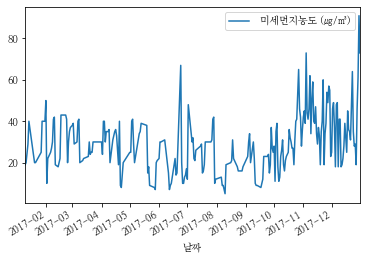

In [15]:
%matplotlib inline
dust.plot.line()

In [16]:
import pdvega

/home/hsm/.venv/lib/python3.6/site-packages/pdvega/_core.py:408: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  ordinal_threshold=0)
/home/hsm/.venv/lib/python3.6/site-packages/pdvega/_core.py:413: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  ordinal_threshold=0)
/home/hsm/.venv/lib/python3.6/site-packages/pdvega/_core.py:418: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  ordinal_threshold=10)


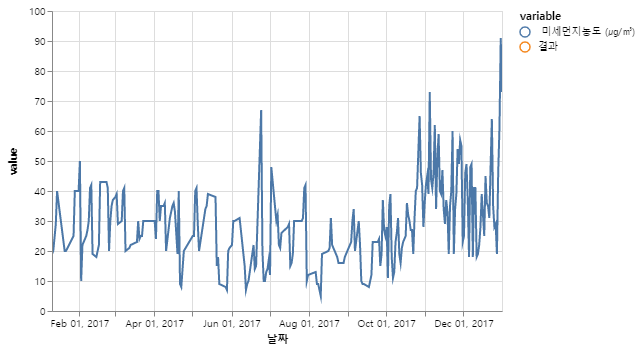

In [17]:
dust.vgplot.line()

# 결론
시계열 분석은 시간에 따라서 어떤 결과가 변해야 하는데, 위의 데이터 같은 경우에는 단지 시간 데이터와 나머지 데이터와 연관성이 있다라는 정도일 뿐이다.